# protostars
## 16- Intercompare the posteriors results
### I. Physical properties of interest

See Issue #16

In [1]:
import pandas as pd

|exp|run |samples | raw_models (G) |
|--|--|--|--|
|3|1 |5000 | 5.6 |
|3|2 |5000 | 5.6 |
|4|1 |5000 | 1.5 |
|5|1 |5000 | 2.9 |
|6|1 |4200$^\dagger$ | -- |
|7|1 |4600$^\dagger$ | -- |
|8|1 |5000 | 1.9 |

$^\dagger$*Metadata blob overflow caused premature termination*  

Experiments 1 and 2 did not save metadata blobs, so we cannot (easily) compute $r_K$.

In [2]:
e3r1 = np.load('../sf/exp3/output/bb_absolute/run01/emcee_chain.npy')
e3r2 = np.load('../sf/exp3/output/bb_absolute/run02/emcee_chain.npy')
e4r1 = np.load('../sf/exp4/output/bb_absolute/run01/emcee_chain.npy')
e5r1 = np.load('../sf/exp5/output/bb_absolute/run01/emcee_chain.npy')
e8r1 = np.load('../sf/exp8/output/bb_absolute/run01/emcee_chain.npy')

In [3]:
e6r1_temp = np.load('../sf/exp6/output/bb_absolute/run01/temp_emcee_chain.npy')
bi = (e6r1_temp == 0.0).all(axis=0).all(axis=1)
e6r1 = e6r1_temp[:, ~bi, :]

In [4]:
e7r1_temp = np.load('../sf/exp7/output/bb_absolute/run01/temp_emcee_chain.npy')
bi = (e7r1_temp == 0.0).all(axis=0).all(axis=1)
e7r1 = e7r1_temp[:, ~bi, :]

In [5]:
e8r1_temp = np.load('../sf/exp8/output/bb_absolute/run01/temp_emcee_chain.npy')
bi = (e8r1_temp == 0.0).all(axis=0).all(axis=1)
e8r1 = e8r1_temp[:, ~bi, :]

In [6]:
e8r1.shape

(40, 5000, 16)

We need the labels for which label is which physical property.

3, 4, and  5 were all the same, just different wavelength regions

In [7]:
l_e3r2 = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 
l_e4r1 = l_e3r2
l_e5r1 = l_e3r2

In [8]:
l_e6r1 = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_V$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

In [9]:
l_e7r1 = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_V$", r"$\lambda^X$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

In [10]:
l_e8r1 = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$A_K$", r"$\lambda^X$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

Burn-in

In [11]:
burned = e3r2[:, -300:,:]
xs, ys, zs = burned.shape
fc_e3r2 = burned.reshape(xs*ys, zs)

In [12]:
for exp in [4,5,6,7,8]: 
    exec("burned = e{}r1[:, -300:,:]".format(exp))
    xs, ys, zs = burned.shape
    exec("fc_e{}r1 = burned.reshape(xs*ys, zs)".format(exp))

In [13]:
fc_e5r1.shape

(12000, 14)

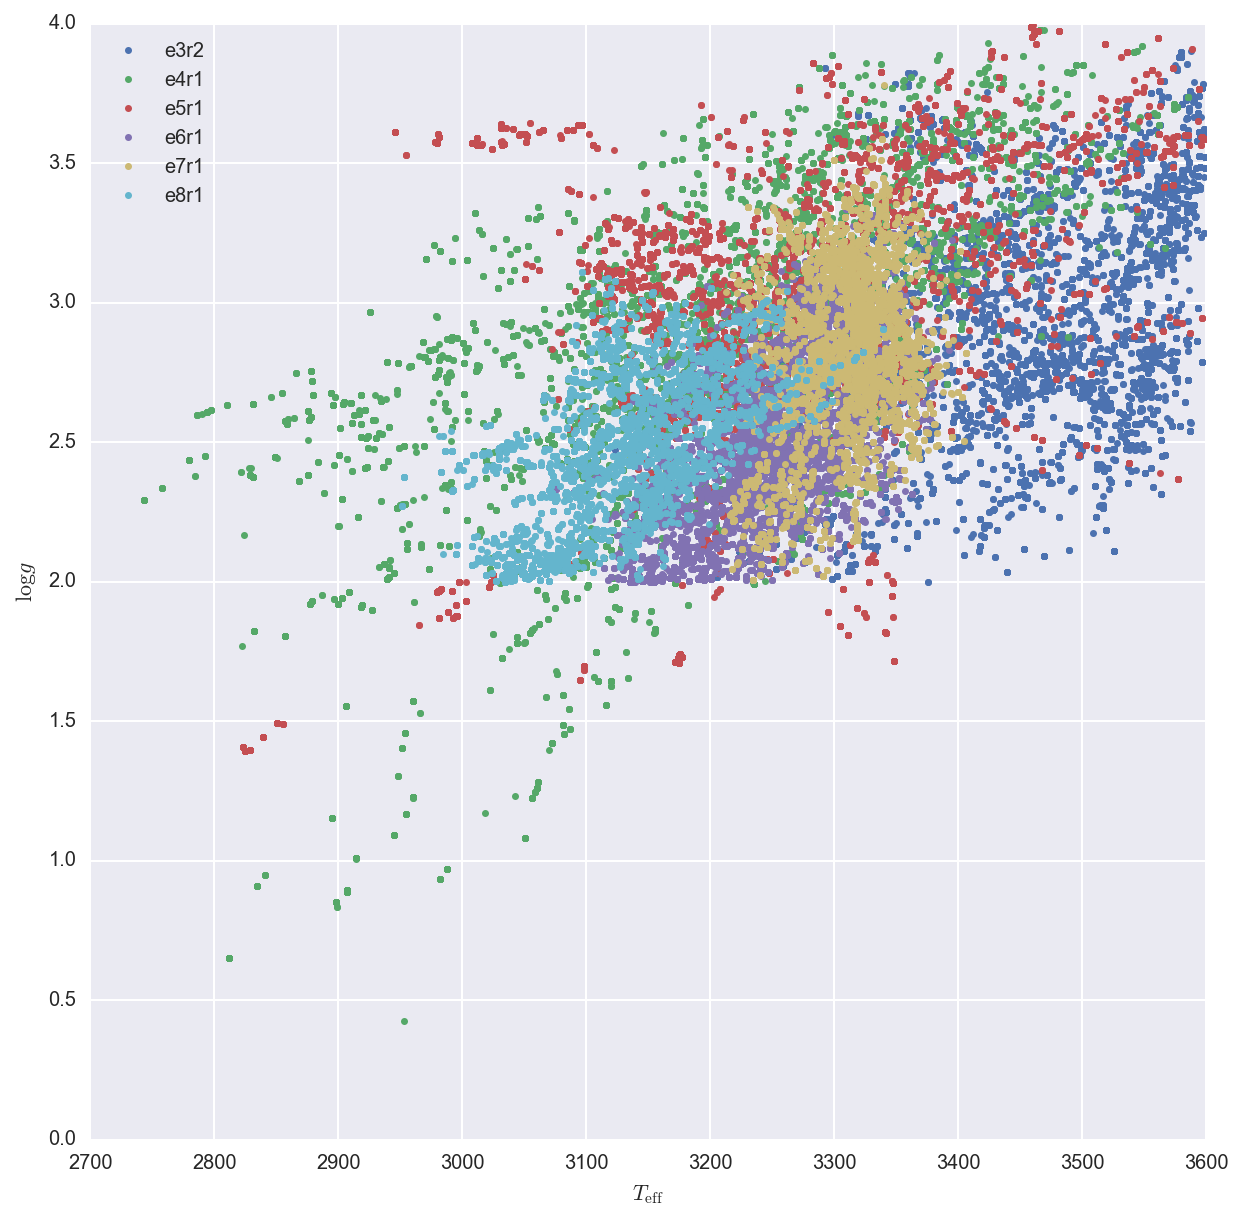

In [15]:
plt.figure(figsize=(10, 10))
fc_list = [fc_e3r2, fc_e4r1, fc_e5r1, fc_e6r1, fc_e7r1, fc_e8r1]
desc_list = ['e3r2', 'e4r1','e5r1','e6r1','e7r1', 'e8r1']
for fc, desc in zip(fc_list, desc_list):
    plt.plot(fc[:, 0], fc[:, 1], '.', alpha=1, label=desc)
    
plt.legend(loc='best')
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$\log{g}$')

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


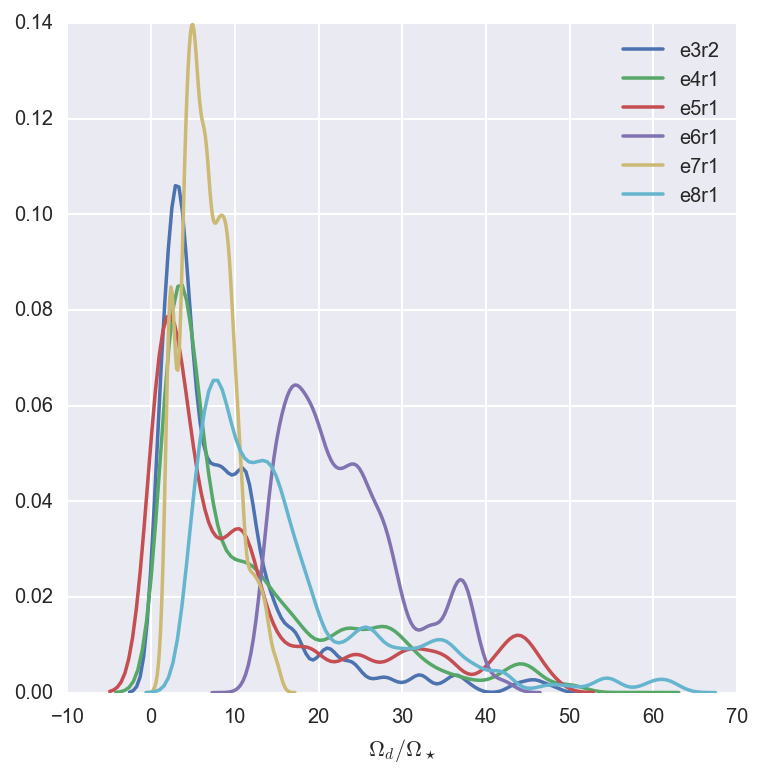

In [16]:
plt.figure(figsize=(6, 6))
for fc, desc in zip(fc_list, desc_list):
    om_rat = 10**fc[:, 7]/(10**fc[:, 5])
    sns.distplot(om_rat, hist=False, label=desc)
    
plt.legend(loc='best')
plt.xlabel('$\Omega_d/\Omega_\star$')

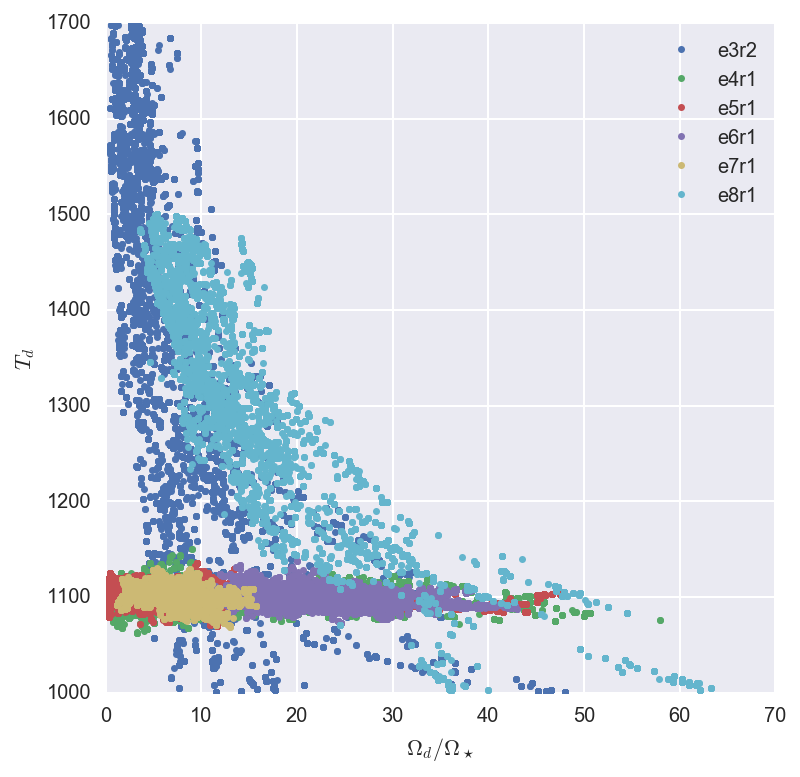

In [17]:
plt.figure(figsize=(6, 6))
for fc, desc in zip(fc_list, desc_list):
    om_rat = 10**fc[:, 7]/(10**fc[:, 5])
    plt.plot(om_rat, fc[:, 6],  '.', label=desc)
    
plt.legend(loc='best')
plt.xlabel('$\Omega_d/\Omega_\star$')
plt.ylabel('$T_{d}$')

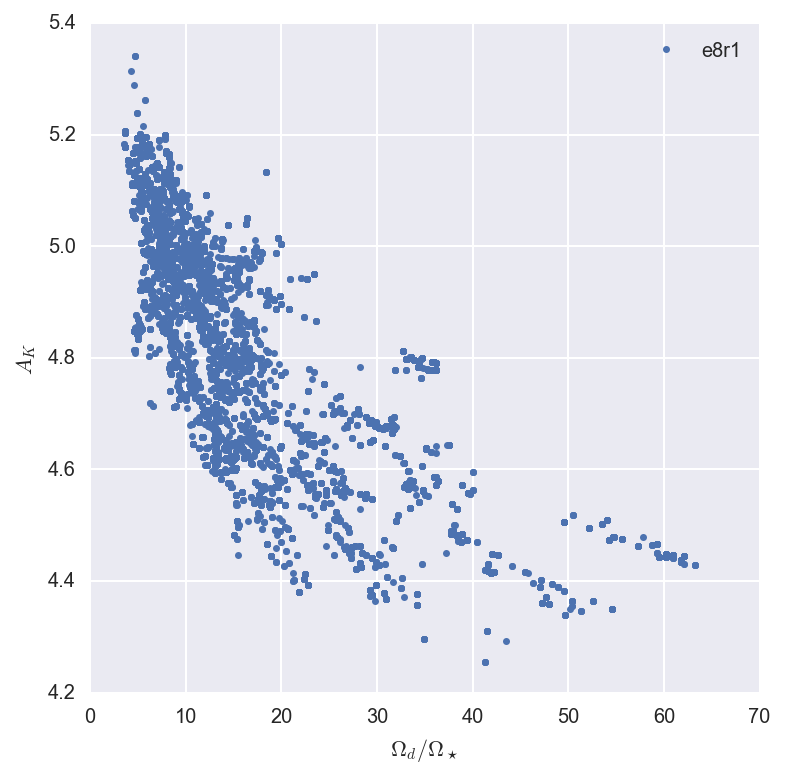

In [19]:
plt.figure(figsize=(6, 6))
fc_list = [fc_e8r1]
desc_list = ['e8r1']
for fc, desc in zip(fc_list, desc_list):
    om_rat = 10**fc[:, 7]/(10**fc[:, 5])
    plt.plot(om_rat, fc[:, 8],  '.', label=desc)
    
plt.legend(loc='best')
plt.xlabel('$\Omega_d/\Omega_\star$')
plt.ylabel('$A_K$')

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


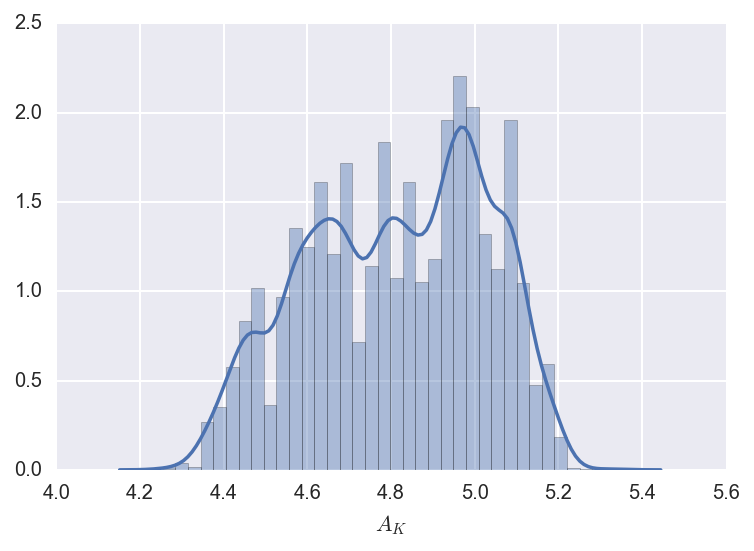

In [20]:
sns.distplot(fc_e8r1[:,8])
plt.xlabel('$A_K$')

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


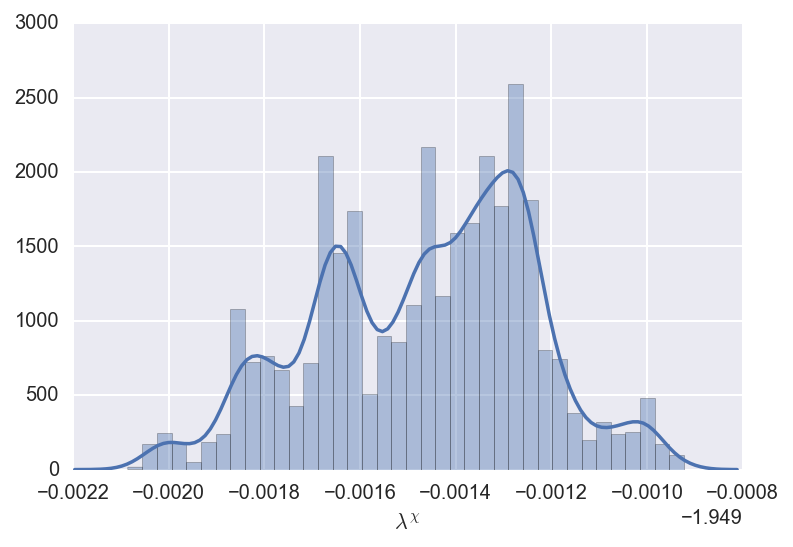

In [21]:
sns.distplot(fc_e8r1[:,9])
plt.xlabel('$\lambda^\chi$')

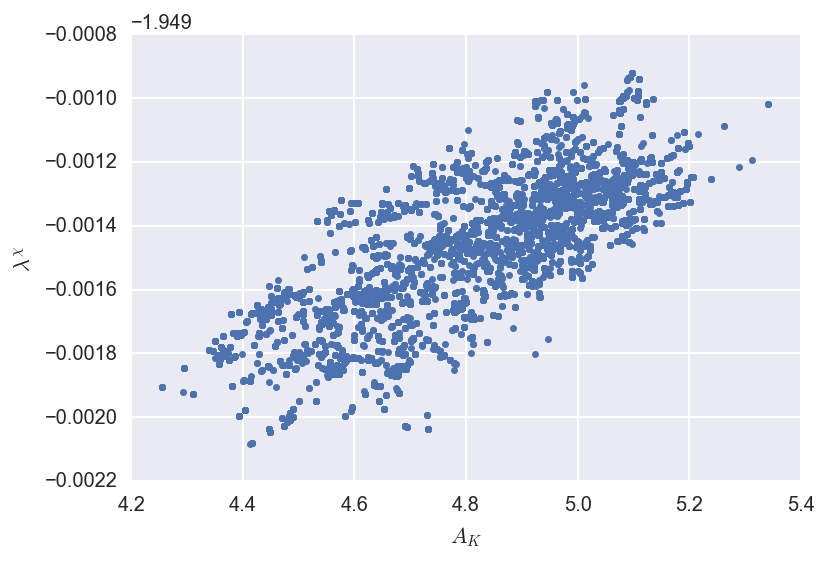

In [22]:
plt.plot(fc_e8r1[:,8], fc_e8r1[:,9], '.')
plt.xlabel('$A_K$')
plt.ylabel('$\lambda^\chi$')